# Part 1 - Dataset 1: NFL Scores

Author: Jansen Dike

Date: October 14th, 2020

# 3.a.) Describe the population

The population being sampled here are NFL games. I have chosen to focus on games that took place in the 2000-2016 seasons. 1999 is the last time there was a team change in the NFL (a new team was created or team name changed).

# 3.b.) Features of the dataset

The features for each sample that I will be focusing on are: Season (year), season week, neutral stadium (True/false), playoff game(True/false), home team, away team, home score, away score, home team win (1 if home team wins, 0.5 if tie, 0 if home team loses), home record, away record, home team points scored per game, home team points scored against per game, away team points scored per game, away team points scored against per game, weather temperature

# 3.c.) Describe each feature

Season: Qualitative, Nominal, Continuous
Season week: Qualitative, Nominal, Discrete
Neutral Stadium: Qualitative, Ordinal, Discrete
Playoff Game: Qualitative, Ordinal, Discrete
Home Team: Qualitative, Nominal, Discrete
Away Team: Qualitative, Nominal, Discrete
Home Score: Quantitative, Nominal, Continuous
Away score: Quantitative, Nominal, Continuous
Home team win: Qualitative, Ordinal, Discrete
Home record: Quantitative, Nominal, Continuous
Away record: Quantitative, Nominal, Continuous
Home team points/game: Quantitative, Nominal, Continuous
Home team points against/game: Quantitative, Nominal, Continuous
Away team points/game: Quantitative, Nominal, Continuous
Away team points against/game: Quantitative, Nominal, Continuous
Weather Temperature: Quantitative, Nominal, Continuous

# 3.d) Is the data complete?

All of the data is complete

# 3.e.) Why these features?

Date and season show the chronological order of games so we can see trends over time.
Whether a game is at a neutral field or is a playoff game can have a large impact on the game outcome.
Knowing the teams that played is important if you want to group data by team, division, etc.
Home vs away teams matter because home field advantage impacts game result sometimes.
The scores are the main focus of the data, it tells us the outcome of a game. We will draw many conclusions from the scores of games.
Home team win shows if home team won the game, this isn't completely necessary as we can tell from the scores, but it may save us some time.
Home team record and away team records can be an indication of who is likely to win if they are different enough (in most cases)
The points scored for and against are a better indication of the outcome of scores, for ex: if the home team scores a lot of points but has a bad defense, it is likely to be a high scoring game.
The weather temperature can also be an indication of the scoring totals of a game, colder weather makes it harder to pass the ball which often results in lower score totals.

# 3.f.) What are some features not included, that would make sense?

A feature that would make sense to be included here would be the number of injuries for each team. Injuries can have a significant impact on games, especially if the best players are injured. We may also be able to tell how injuries affect the scores in other ways as well. But this may be difficult information to find for so many games.

Another feature that would make sense would be the weather. The weather often affects the play style of teams, for example, if it is cold and rainy, a team may run the ball more than pass because it may be harder to throw and catch. So the games may result in a lower score.

Note: I was able to find data for temperature

# 3.g) Describe how the data can be pivoted

You could pivot the data to look at a specific team's game's over the years. The index could be the NFL season, the column would be a team or teams, and the value could be their score or the result. This would tell us how the team performs each season to see if they played best a certain year. We could also look at how many points they were able to score, this could show if there was a particular season that a team scored a high number of points.

# 3.h) Identifying relationships

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in csv file using pandas and load into data frame

NFL_scores = pd.read_csv('NFL_games_final.csv',
                      header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
                             'team_home', 'score_home', 'score_away', 'team_away', 'team_favorite', 
                             'home_spread', 'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature',
                             'weather_wind_mph', 'weather_humidity', 'weather_detail', 'home_record', 'away_record',
                             'home_points_per_game', 'home_points_against_per_game', 'away_points_per_game',
                             'away_points_against_per_game', 'home_team_win', 'prev_home_record', 'prev_away_record'
                            ],
                      skiprows=1
                     )


In [2]:
team_scores = NFL_scores[['schedule_season', 'score_home', 'score_away']]    # Sub frame with scores and season only
team_scores = team_scores[team_scores['schedule_season'] < 2020]
total_scores = pd.DataFrame(team_scores, columns=['schedule_season', 'score_home', 'score_away', 'score_total'])  # Added total as a column
total_scores['score_total'] = team_scores['score_home'] + team_scores['score_away']    # new total column is score1 and 2 columns added together

# i) Show at least one visualization

I believe there is a possible relationship between the total number of points scored (Home team score + Away team score) per game and the season. Over time, the style of football has changed to a much more pass-heavy offensive style, this results in teams going down the field faster by taking more chances and executing more passing plays. Which ultimately leads to more scoring. 

Average Total Points Scored Per Game 2000-2019 Seasons


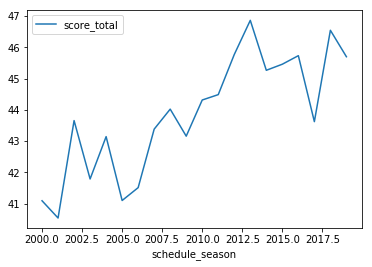

In [3]:
totals = total_scores[['schedule_season', 'score_total']]    # sub-frame with just season and total columns
totals = totals.groupby(by='schedule_season').mean()    # Calculate mean by season and change totals column
tplot = totals.groupby(by='schedule_season').mean().plot.line(y='score_total')    # Create line plot for average total points
print("Average Total Points Scored Per Game 2000-2019 Seasons")    # Label

# ii) How can this be analyized with statistical techniques?

From the table we can tell that the range of average values is (46.87-40.54 =) 6.33 points. In football this is more than a touchdown (6 points) which is a significant change. Considering there were over 200 football games for each season, I believe the change in average is significant enough to support my hypothesis that the scoring has increased since 1999.

I believe another good technique would be to determine the correlation coefficient for the relationship between season and average total score of games.

In [4]:
totals

,score_total
schedule_season,
2000,41.092664
2001,40.540541
2002,43.659176
2003,41.790262
2004,43.146067
2005,41.101124
2006,41.513109
2007,43.385768
2008,44.026217


# iii) What can be hypothesized that might not be included in the dataset?

One possible relationship that is not included in the data, that could help prove my earlier hypothesis, would be a breakdown of offensive plays of each team. We could tell from this how many passing plays a team uses compared to the number of running plays. I believe this would also be related to the season and the total number of points scored in each season.

Another possible relationship not in the data would be weather or time of day for a game. I believe it is possible that these would affect the outcome of a game such as the total scoring or how well a team does. I do not think that you can accurately hypothesize about this relationship because I think the impact that those features have on outcome of a game would vary too much to make an assumption.

# I) What data features could be engineered here?

I created the total feature in the data to compare total scores over time, it was useful in seeing the average and how scoring changed with each season.

Another feature that may be useful to engineer would be home team point differential. This could be calculated by finding the difference between the home team and away team score but would be a simple visualization about how home team advantage my impact the score of the game.

Another feature that could be created here would be the month or season the game is played in. NFL football games typically range from September-February and the weather changes significantly. This might affect how certain teams play, maybe teams from Southern states like Florida do worse when it gets colder and they have to play in Northern US regions.

UPDATE: I computed the following statistics for each game using the orginal data: home_record, away_record, prev home/away records, points per game, and points against/game for home and away, I also had to compute the home_team_win feature.

# 1.) Summarizing the data

The data I am using is comprised of thousands of NFL games ranging from 2000-2019. The National Football League is a 32 team American football league in which 16 regular season games are played each year, then there are playoffs each year to determine who wins the Super Bowl (championship game). The features for this dataset include weather, results from the game, as well as some team statistics such as points scored per game. During and after games NFL statisticians record the data and it is available to the public. I had to engineer some of the features in this dataset such as the team records and points per game for each team.

# 2.) Classes within the data

One class that is prevalant in the data is whether or not the home team wins, you may be able to guess which team is going to win based on the spread (who is favored and by how many points) as well as the records of each team, although its not guaranteed to be the correct classification based on those features. For example, if the home team has a much better record and is favored in the spread, then they would be more likely to win that game.

Similarly the total score could be classified on whether it would be less than or greater than the over/under line (predicted total score). This would rely on features such as weather temperature, as well points scored per game and points scored against per game for both teams. The lower these features are, the more likely that a game will be under the projected total.

# 3.) What parameters could be learned by an unsupervised machine learning algorithm?

I believe an unsupervised machine learning algorithm may be able to model a teams record or at least classify teams as "good" or "bad". I believe if it took data on the spread, as well as a team's average points scored and scored against, and maybe even their record from the previous year then it would be able to separate better performing teams from the worse.

An unsupervised learning algorithm may be able to effectively model a team's score (or they're average deficit, how much they win or lose by) based on the same stats above but including a teams record as well.